In [5]:
import pymysql
import pandas as pd
conn = pymysql.connect(host='multi-bigdata.cljkqcsbb9ok.ap-northeast-2.rds.amazonaws.com',port=3306,user='edu02',passwd='edu02', db='edudb01')
# sql = 'select * from NaverShopProductRate where level = \'L1\''
sql = '''
SELECT B.productdate
        ,A.productcid
		,A.productcname
		,A.level
		,A.productpath
		,B.productvalue

FROM NaverShopProductCode	AS A

LEFT JOIN NaverShopProductRate AS B
ON A.productcid = B.productcid

WHERE 1 = 1
AND A.level = 'L1'
'''

tsProduct = pd.read_sql_query(sql,conn)
conn.close()

tsProduct['tsdate'] = pd.to_datetime(tsProduct['productdate'], format='%Y%m%d')
# tsProduct.set_index('tsdate', inplace=True)

tsSet = tsProduct[['tsdate', 'productcname', 'productvalue']]

display(tsSet)


,tsdate,productcname,productvalue
0,2019-11-01,패션의류,59.14460
1,2019-11-02,패션의류,68.94930
2,2019-11-03,패션의류,81.40500
3,2019-11-04,패션의류,73.26960
4,2019-11-05,패션의류,73.12700
...,...,...,...
4021,2020-10-27,면세점,11.45070
4022,2020-10-28,면세점,11.33350
4023,2020-10-29,면세점,9.65172
4024,2020-10-30,면세점,8.92203


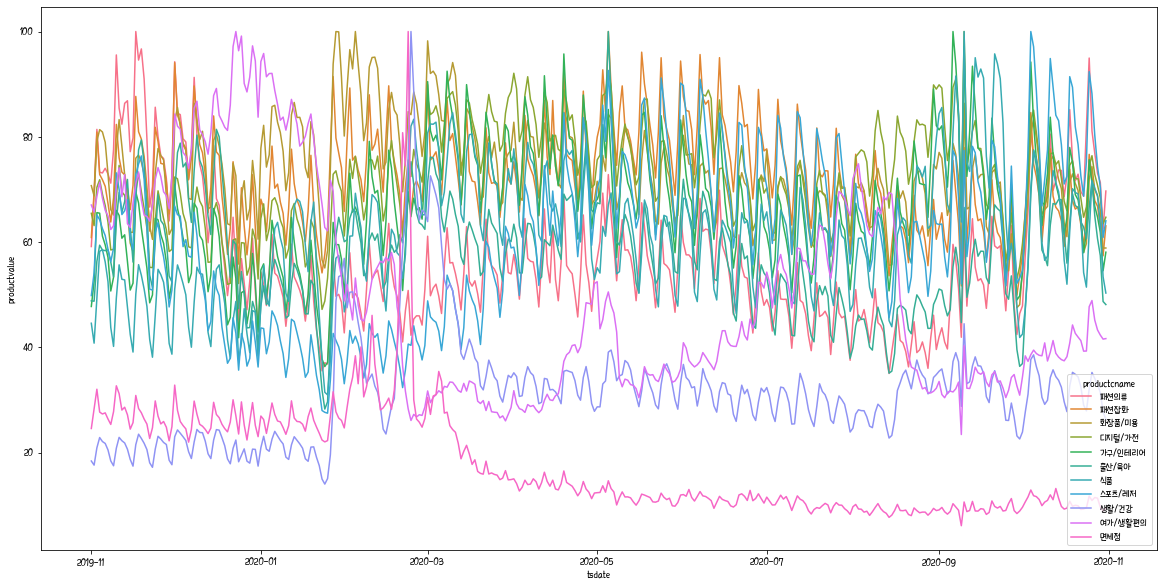

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/PyStexam/data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20, 10))
sns.lineplot(x="tsdate", y="productvalue", hue="productcname", data=tsSet)
plt.show()